In [3]:
import pandas as pd
import numpy as np

# Leer el archivo CSV
mydata = pd.read_csv("C:\\Users\\Polar\\Documents\\ESCUELA\\5TO_SEMESTRE\\MAKINITAS\\Practica3\\winequality-red.csv", delimiter=';')

# Crear el DataFrame
df = mydata

# Verificar la forma del DataFrame
print('Original Dataframe shape :', df.shape)

# Definir las características de entrada (Input features)
X = df[df.columns[:-1]]  # Selecciona todas las columnas excepto la última (que generalmente es la etiqueta o el target)
print('Inputs Dataframe shape   :', X.shape)


Original Dataframe shape : (1599, 12)
Inputs Dataframe shape   : (1599, 11)


Normalizar dataset

In [4]:
# Mean
X_mean = X.mean()

print(X_mean)

fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
dtype: float64


Desviacion estandar


In [5]:

# Standard deviation
X_std = X.std()
print(X_std)

fixed acidity            1.741096
volatile acidity         0.179060
citric acid              0.194801
residual sugar           1.409928
chlorides                0.047065
free sulfur dioxide     10.460157
total sulfur dioxide    32.895324
density                  0.001887
pH                       0.154386
sulphates                0.169507
alcohol                  1.065668
dtype: float64


In [6]:
# Standardization
Z = (X - X_mean) / X_std
print(Z)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.528194          0.961576    -1.391037       -0.453077  -0.243630   
1         -0.298454          1.966827    -1.391037        0.043403   0.223805   
2         -0.298454          1.296660    -1.185699       -0.169374   0.096323   
3          1.654339         -1.384011     1.483689       -0.453077  -0.264878   
4         -0.528194          0.961576    -1.391037       -0.453077  -0.243630   
...             ...               ...          ...             ...        ...   
1594      -1.217415          0.403103    -0.980362       -0.382151   0.053829   
1595      -1.389721          0.123866    -0.877693       -0.240300  -0.541090   
1596      -1.159980         -0.099523    -0.723690       -0.169374  -0.243630   
1597      -1.389721          0.654416    -0.775024       -0.382151  -0.264878   
1598      -1.332285         -1.216469     1.021680        0.752659  -0.434854   

      free sulfur dioxide  

In [8]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


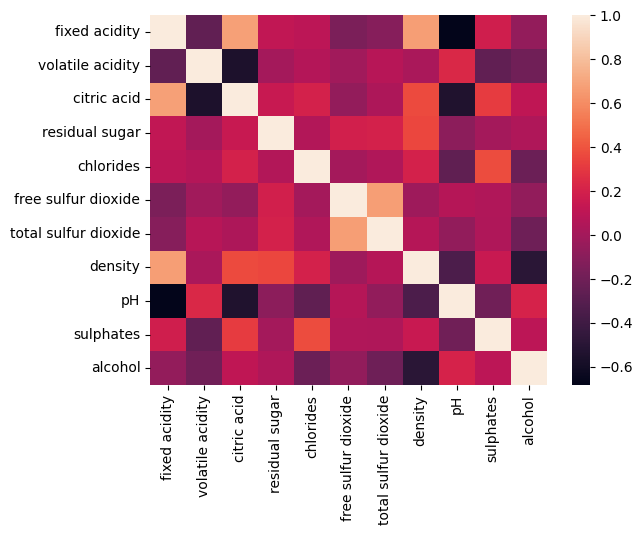

In [9]:
# covariance
c = Z.cov()

# Plot the covariance matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(c)
plt.show()


Calcular los eigenvalores y los eigenvectores.
Estos se calculan por rasgos

In [10]:
eigenvalues, eigenvectors = np.linalg.eig(c)
print('Eigen values:\n', eigenvalues)
print('Eigen values Shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)

Eigen values:
 [3.09913244 1.92590969 1.55054349 1.21323253 0.95929207 0.05955831
 0.18133317 0.34464212 0.4229567  0.58379122 0.65960826]
Eigen values Shape: (11,)
Eigen Vector Shape: (11, 11)


Ordenar eigenvalores y eigenvectores

In [11]:
# Index the eigenvalues in descending order
idx = eigenvalues.argsort()[::-1]

# Sort the eigenvalues in descending order
eigenvalues = eigenvalues[idx]

# sort the corresponding eigenvectors accordingly
eigenvectors = eigenvectors[:,idx]


Suma acumulativa de eigenvalores, aportación de información

In [12]:
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
explained_var


array([0.28173931, 0.45682201, 0.59778051, 0.70807438, 0.79528275,
       0.85524714, 0.90831906, 0.94676967, 0.97810077, 0.99458561,
       1.        ])

Nos quedamos con el número de componentes que garanticen el 50% de la info.

In [18]:
n_components = np.argmax(explained_var >= 0.50) + 1
n_components

np.int64(3)

Crear matriz de PCA a partir de las 2 primeras componentes de los eigenvectores orrdenados. Paso a dataframe.

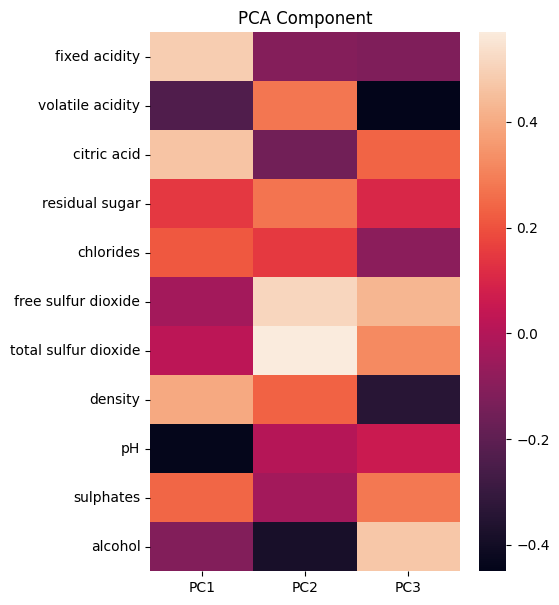

In [20]:
# PCA component or unit matrix
u = eigenvectors[:,:n_components]
pca_component = pd.DataFrame(u,
                             index = df.columns[:-1],
                             columns = ['PC1', 'PC2', 'PC3']
                            )

# plotting heatmap
plt.figure(figsize =(5, 7))
sns.heatmap(pca_component)
plt.title('PCA Component')
plt.show()

In [21]:
# Matrix multiplication or dot Product
Z_pca = Z @ pca_component
# Rename the columns name
Z_pca.rename({'PC1': 'PCA1', 'PC2': 'PCA2', 'PC3':'PCA3'}, axis=1, inplace=True)
# Print the  Pricipal Component values
print(Z_pca)

          PCA1      PCA2      PCA3
0    -1.619023  0.450809 -1.773899
1    -0.798920  1.855972 -0.911405
2    -0.748245  0.881763 -1.171028
3     2.356935 -0.269892  0.243413
4    -1.619023  0.450809 -1.773899
...        ...       ...       ...
1594 -2.149828  0.814031  0.616870
1595 -2.213804  0.892822  1.806837
1596 -1.455674  0.311648  1.123888
1597 -2.269808  0.979485  0.627768
1598 -0.426841 -0.536522  1.628446

[1599 rows x 3 columns]


Version de skylearn


In [23]:
# Importing PCA
from sklearn.decomposition import PCA

# Let's say, components = 2
pca = PCA(n_components=3)
pca.fit(Z)
x_pca = pca.transform(Z)

# Create the dataframe
df_pca1 = pd.DataFrame(x_pca,
                       columns=['PC{}'.
                       format(i+1)
                        for i in range(n_components)])
print(df_pca1)

           PC1       PC2       PC3
0    -1.619023  0.450809 -1.773899
1    -0.798920  1.855972 -0.911405
2    -0.748245  0.881763 -1.171028
3     2.356935 -0.269892  0.243413
4    -1.619023  0.450809 -1.773899
...        ...       ...       ...
1594 -2.149828  0.814031  0.616870
1595 -2.213804  0.892822  1.806837
1596 -1.455674  0.311648  1.123888
1597 -2.269808  0.979485  0.627768
1598 -0.426841 -0.536522  1.628446

[1599 rows x 3 columns]


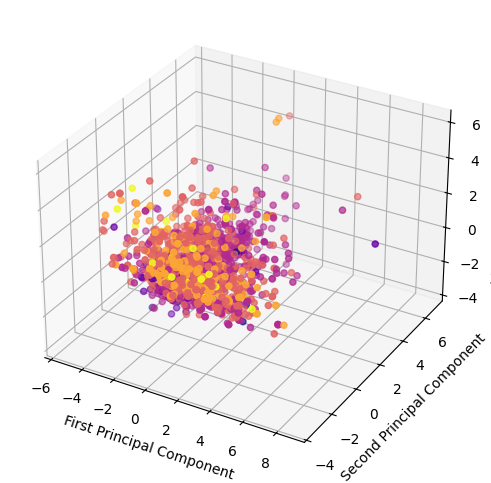

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Giving a larger plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

# Scatter plot in 3D
ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2],
           c=mydata['quality'],  # Cambia 'quality' por el nombre correcto de tu columna
           cmap='plasma')

# Labeling x, y, and z axes
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')

plt.show()
